In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

#functions
import wrangle as wr

warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### Acquire csv files from 
https://data.world/uci/wine-quality

### Read csv files
- red wine csv
- white wine csv

#### Features/data dictionary
1. fixed_acidity       -  decimal
2. volatile_acidity    -  decimal
3. citric_acid         -  decimal
4. residual_sugar      -  decimal
5. chlorides -decimal
6. free_sulfur_dioxide -  decimal
7. total_sulfur_dioxide-  decimal
8. density             -  decimal
9. ph -decimal
10. sulphates           -  decimal
11. alcohol             -  decimal

#### Target Variable
12. quality             -  integer


In [10]:
#read in csv
#values in csv are separated by semicolon, call that argument with sep=';'
red = pd.read_csv('codeup-wine-quality-project/winequality-red.csv', sep= ';')

In [11]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Analyze/view the data 
- check for nulls
- rename columns
- learn about size/attributes/components

In [13]:
#null check
red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
#getting rid of spaces in the features
red = red.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})


In [17]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis
- do an initial exploration
- identify potential correlations
- identify outliers
- remove outliers
- split data
- run statistical tests/hypothesis testing
- identify key features
- implement feature engineering

In [58]:
red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<AxesSubplot:>

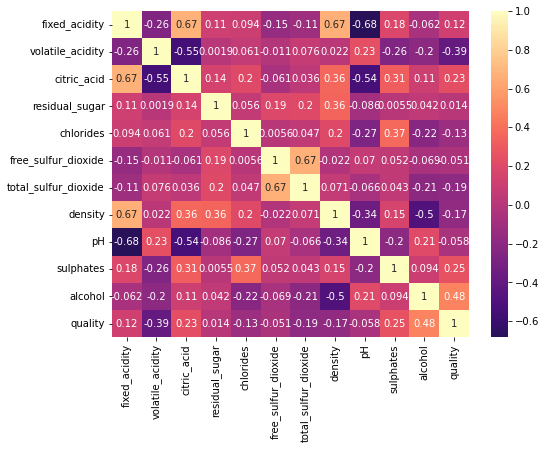

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(red.corr(), cmap='magma', center= 0, annot=True)

#### Heatmap takeaways:
1. strong pos correlation between alcohol and quality
2. pos correlation between sulphates/citric acid/fixed acidity and quality
3. neg correlation between ph/density/chlorides and quality
4. strong neg correlation between volatile_acidity and quality
5. ph and fixed/volatile_acidity as expected are correlated
6. fixed_acidity and density/citric_acid are strongly correlated
7. residual_sugar and density are correlated
8. chlorides and sulphates are correlated
9. free_sulfur_dioxide and total SO2 as expected are correlated
10. density and alcohol/ph are strongly negatively correlated
11. density and residual_sugar/citric_acid are pos correlated
12. ph and alcohol/volatile_acidity are pos correlated
13. ph and sulphates/chlorides/citric_acid/fixed_acidity are neg correlated, as expected -> compounds effect ph
14. sulfates and citric_acid/fixed_acidity are pos correlated
15. alcohol and total_sulfur_dioxide/chlorides/volatile_acidity are neg correlated
16. alcohol and sulphates/citric_acid are pos correlated

In [22]:
def jointplot(x, y, df):
    '''
    jointplot will take in a feature("x") and a target("y") 
    and plot a corresponding scatter and distribution.
    '''
    
    p = sns.jointplot(x=x, y=y, data=red, kind="hex", color="mediumslatered")
    
    return p

In [32]:
sns.set_style("whitegrid")

(<AxesSubplot:xlabel='fixed_acidity', ylabel='Density'>,)

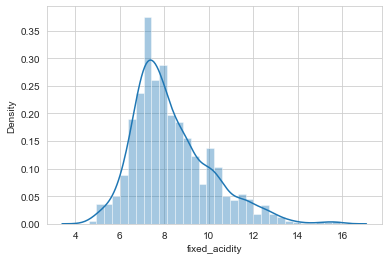

In [39]:
#check distribution with distplots
sns.distplot(red['fixed_acidity']),

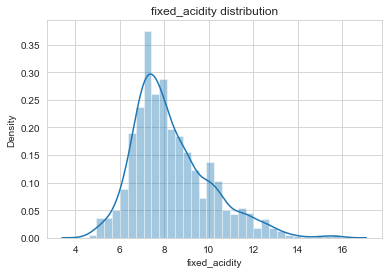

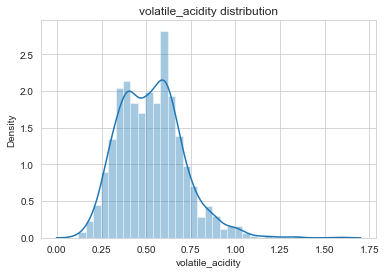

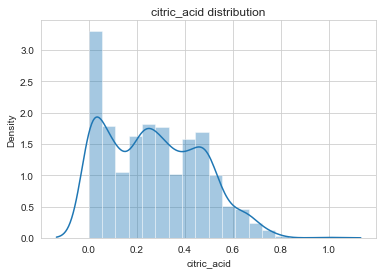

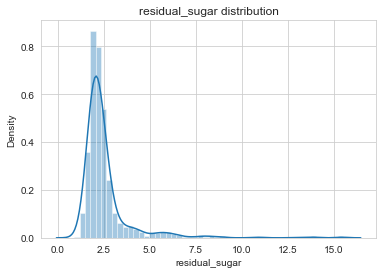

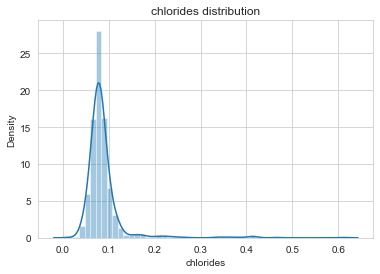

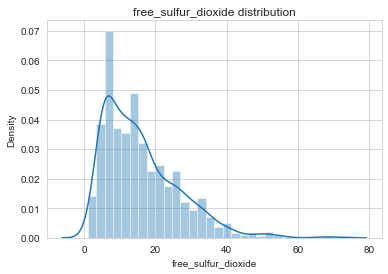

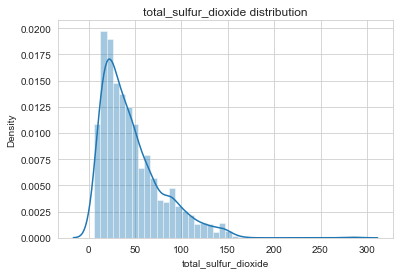

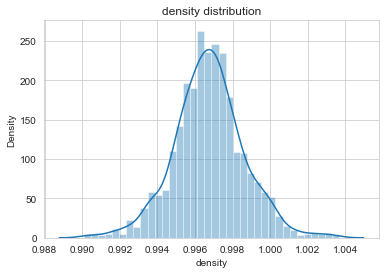

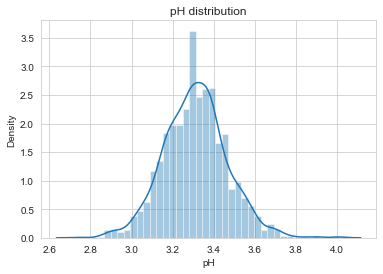

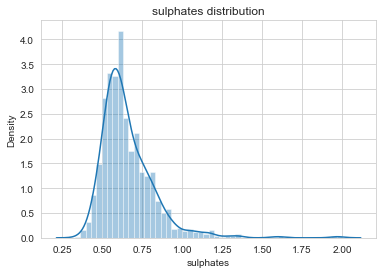

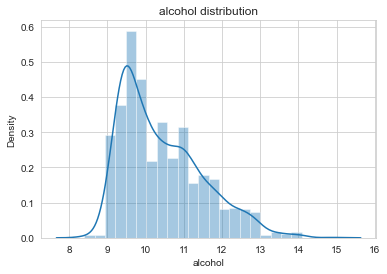

In [117]:
#boxplots of distributions
sns.distplot(red.fixed_acidity);
plt.title("fixed_acidity distribution")
plt.show()
sns.distplot(red.volatile_acidity);
plt.title("volatile_acidity distribution")
plt.show()
sns.distplot(red.citric_acid);
plt.title("citric_acid distribution")
plt.show()
sns.distplot(red.residual_sugar);
plt.title("residual_sugar distribution")
plt.show()
sns.distplot(red.chlorides);
plt.title("chlorides distribution")
plt.show()
sns.distplot(red.free_sulfur_dioxide);
plt.title("free_sulfur_dioxide distribution")
plt.show()
sns.distplot(red.total_sulfur_dioxide);
plt.title("total_sulfur_dioxide distribution")
plt.show()
sns.distplot(red.density);
plt.title("density distribution")
plt.show()
sns.distplot(red.pH);
plt.title("pH distribution")
plt.show()
sns.distplot(red.sulphates);
plt.title("sulphates distribution")
plt.show()
sns.distplot(red.alcohol);
plt.title("alcohol distribution")
plt.show()

<AxesSubplot:xlabel='fixed_acidity'>

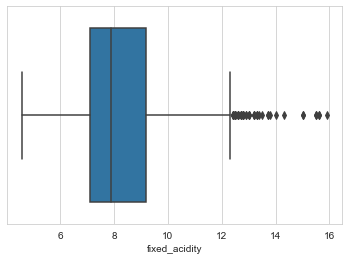

In [38]:
#checking for outliers with boxplots
sns.boxplot(x='fixed_acidity', data=red)

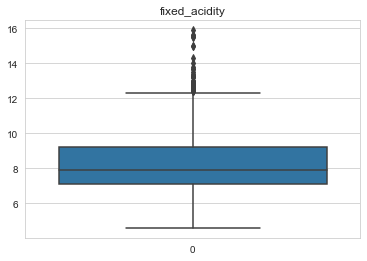

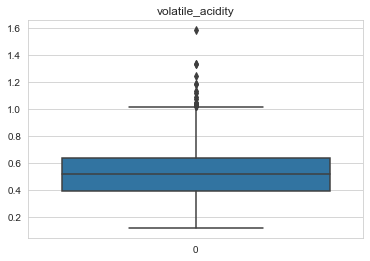

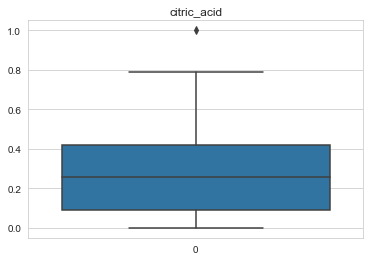

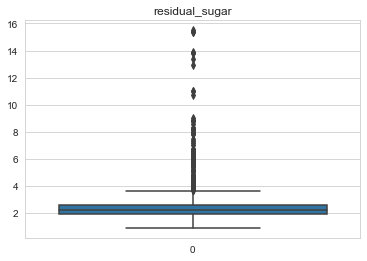

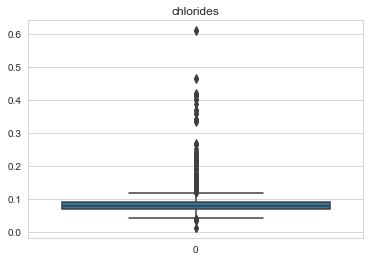

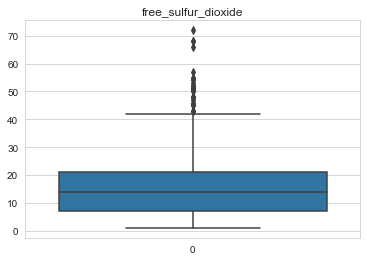

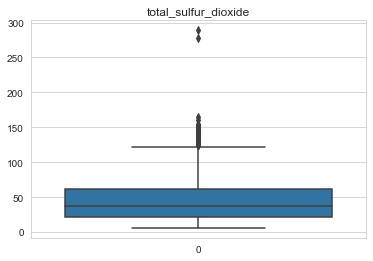

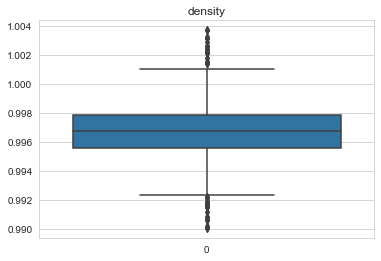

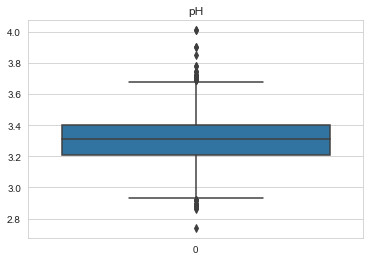

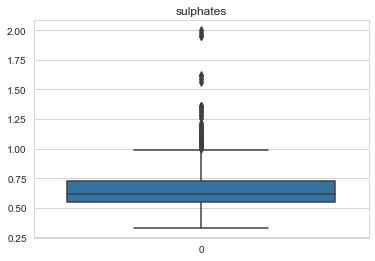

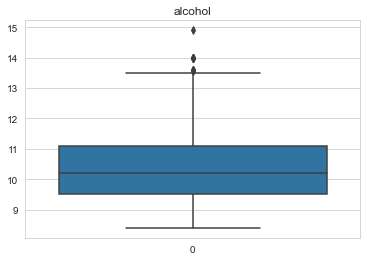

In [57]:
#boxplots of features
sns.boxplot(data=red.fixed_acidity);
plt.title("fixed_acidity")
plt.show()
sns.boxplot(data=red.volatile_acidity);
plt.title("volatile_acidity")
plt.show()
sns.boxplot(data=red.citric_acid);
plt.title("citric_acid")
plt.show()
sns.boxplot(data=red.residual_sugar);
plt.title("residual_sugar")
plt.show()
sns.boxplot(data=red.chlorides);
plt.title("chlorides")
plt.show()
sns.boxplot(data=red.free_sulfur_dioxide);
plt.title("free_sulfur_dioxide")
plt.show()
sns.boxplot(data=red.total_sulfur_dioxide);
plt.title("total_sulfur_dioxide")
plt.show()
sns.boxplot(data=red.density);
plt.title("density")
plt.show()
sns.boxplot(data=red.pH);
plt.title("pH")
plt.show()
sns.boxplot(data=red.sulphates);
plt.title("sulphates")
plt.show()
sns.boxplot(data=red.alcohol);
plt.title("alcohol")
plt.show()


#### Looks like there are some outliers that we should handle

In [61]:
#utilize helper function to split df, stratified on target, return train df, as well as 
train, X_train, X_validate, X_test, y_train, y_validate, y_test = wr.split(red, 'quality')

In [64]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
417,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.5,5
546,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6
516,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.9,6
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
1100,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,6


In [65]:
train.shape

(895, 12)

In [164]:
train['log_density_feature'] = -1/np.log10(train.density)

In [165]:
train.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
log_density_feature     0
dtype: int64

In [166]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,log_density_feature
417,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.5,5,522.162655
546,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6,1353.310200
516,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.9,6,-2303.736194
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6,821.199988
1100,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,6,377.562191


<AxesSubplot:>

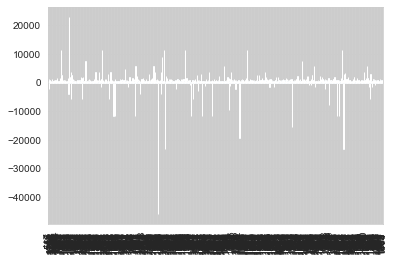

In [167]:
train['log_density_feature'].plot(kind='bar')

### Statistical testing

In [118]:
def correlation_test(Ho, Ha, x, y):
    '''
    correlation_test will take in two arguments and 
    - plot a scatterplot of them
    - test the correlation
    return: the correlation coefficient, p, and if there is a linear relationship.
    '''
    
    splot = plt.scatter(x, y)
    
    null_hypothesis = Ho
    alternative_hypothesis = Ha
    
    confidence_level = .95
    a = 1 - confidence_level 
    
    corr, p = stats.pearsonr(x, y)

    if p < a:
        print(f"Reject null statment: {null_hypothesis}")
        print("There is a linear relationship.")
        if 0 < corr < .6:
            print("there is a positive weak one.")
        elif .6 < corr < 1:
            print("That is a stronger positive correlation.")
        elif -.6 < corr < 0:
            print("there is a negative weak one.")
        elif -1 < corr < -.6:
            print("That is a stronger negative correlation.")
        
    else : 
        print("Fail to reject the null hypothesis.")
        
    print(f"""
    Correlation Coefficient: {corr}
    p: {p}
    
    """)
    return splot

### 1. strong pos correlation between alcohol and quality

In [119]:
#assign your null hypothesis
Ho = "No correlation between alcohol and quality."

#and your alternative hypothesis
Ha = "There is a correlation between alcohol and quality."

#the feature you are testing
x1 = train.alcohol

#against your target
y1 = train.quality

Reject null statment: No correlation between alcohol and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.5058275857220219
    p: 2.5965006260626788e-59
    
    


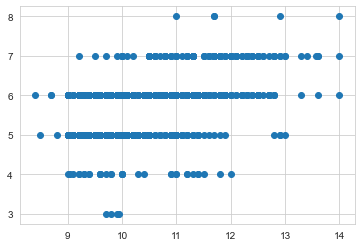

In [120]:
correlation_test(Ho, Ha, x1, y1)

### 2. pos correlation between sulphates/citric acid/fixed acidity and quality

In [123]:
#assign your null hypothesis
Ho = "No correlation between sulphates and quality."

#and your alternative hypothesis
Ha = "There is a correlation between sulphates and quality."

#the feature you are testing
x1 = train.sulphates

#against your target
y1 = train.quality

Reject null statment: No correlation between sulphates and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13
    
    


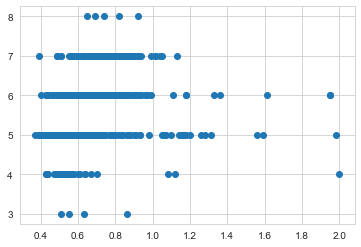

In [124]:
correlation_test(Ho, Ha, x1, y1)

In [126]:
#assign your null hypothesis
Ho = "No correlation between citric_acid and quality."

#and your alternative hypothesis
Ha = "There is a correlation between citric_acid and quality."

#the feature you are testing
x1 = train.sulphates

#against your target
y1 = train.quality

Reject null statment: No correlation between citric_acid and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13
    
    


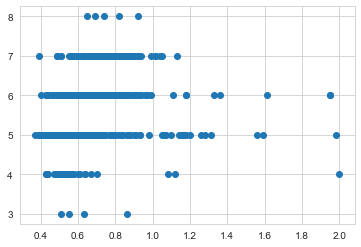

In [127]:
correlation_test(Ho, Ha, x1, y1)

In [130]:
#assign your null hypothesis
Ho = "No correlation between fixed_acidity and quality."

#and your alternative hypothesis
Ha = "There is a correlation between fixed_acidity and quality."

#the feature you are testing
x1 = train.fixed_acidity

#against your target
y1 = train.quality

Reject null statment: No correlation between fixed_acidity and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.11803244569675303
    p: 0.0004023084389424685
    
    


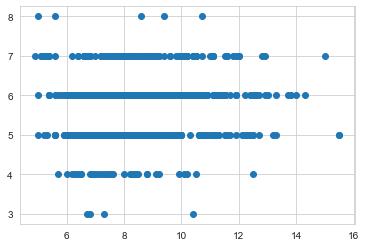

In [131]:
correlation_test(Ho, Ha, x1, y1)

### 3. neg correlation between ph/density/chlorides and quality

In [133]:
#assign your null hypothesis
Ho = "No correlation between pH and quality."

#and your alternative hypothesis
Ha = "There is a correlation between pH and quality."

#the feature you are testing
x1 = train.pH

#against your target
y1 = train.quality

Fail to reject the null hypothesis.

    Correlation Coefficient: -0.038358069617661736
    p: 0.2516465236893746
    
    


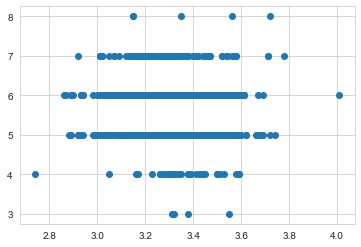

In [134]:
correlation_test(Ho, Ha, x1, y1)

In [135]:
#assign your null hypothesis
Ho = "No correlation between density and quality."

#and your alternative hypothesis
Ha = "There is a correlation between density and quality."

#the feature you are testing
x1 = train.density

#against your target
y1 = train.quality

Reject null statment: No correlation between density and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.174558404107124
    p: 1.4779499074184612e-07
    
    


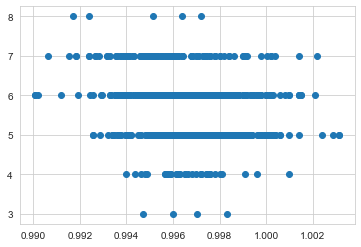

In [136]:
correlation_test(Ho, Ha, x1, y1)

In [168]:
#assign your null hypothesis
Ho = "No correlation between chlorides and quality."

#and your alternative hypothesis
Ha = "There is a correlation between chlorides and quality."

#the feature you are testing
x1 = train.chlorides

#against your target
y1 = train.quality

Reject null statment: No correlation between chlorides and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.1460824605018894
    p: 1.1453779437218817e-05
    
    


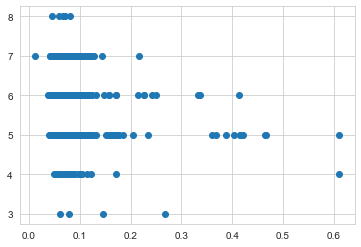

In [169]:
correlation_test(Ho, Ha, x1, y1)

#### Heatmap takeaways:
1. strong pos correlation between alcohol and quality
2. pos correlation between sulphates/citric acid/fixed acidity and quality
3. neg correlation between ph/density/chlorides and quality
4. strong neg correlation between volatile_acidity and quality
5. ph and fixed/volatile_acidity as expected are correlated
6. fixed_acidity and density/citric_acid are strongly correlated
7. residual_sugar and density are correlated
8. chlorides and sulphates are correlated
9. free_sulfur_dioxide and total SO2 as expected are correlated
10. density and alcohol/ph are strongly negatively correlated
11. density and residual_sugar/citric_acid are pos correlated
12. ph and alcohol/volatile_acidity are pos correlated
13. ph and sulphates/chlorides/citric_acid/fixed_acidity are neg correlated, as expected -> compounds effect ph
14. sulfates and citric_acid/fixed_acidity are pos correlated
15. alcohol and total_sulfur_dioxide/chlorides/volatile_acidity are neg correlated
16. alcohol and sulphates/citric_acid are pos correlated